In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train_test = pd.concat([train,test])

In [4]:
train_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [5]:
cats = []
conts = []
for i in train.columns:
    if train[i].dtype=='object':
        cats.append(i)
    else:
        conts.append(i)
cats.append('Transported')

In [6]:
train[conts].corr()['Transported'].sort_values()

RoomService    -0.244611
Spa            -0.221131
VRDeck         -0.207075
Age            -0.075026
ShoppingMall    0.010141
FoodCourt       0.046566
Transported     1.000000
Name: Transported, dtype: float64

In [7]:
for i in train_test[cats].columns:
    print(i)
    print(len(train_test[cats][i].unique()))

PassengerId
12970
HomePlanet
4
CryoSleep
3
Cabin
9826
Destination
4
VIP
3
Name
12630
Transported
3


In [8]:
train_test.drop(['PassengerId', 'Cabin', 'Name'], axis=1)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,NaN
4273,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,NaN
4274,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,NaN
4275,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,NaN


In [9]:
full_set = pd.get_dummies(train_test.drop(['PassengerId', 'Cabin', 'Name'], axis=1), drop_first=True)

In [10]:
full_set

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Transported_True
0,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0,0,0,0,1,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,1,0,0,0,1,1,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,1,0,0,0,1,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0
4273,42.0,0.0,847.0,17.0,10.0,144.0,0,0,0,0,1,0,0
4274,NaN,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0
4275,NaN,0.0,2680.0,0.0,0.0,523.0,1,0,0,0,0,0,0


In [11]:
full_set.isna().sum()

Age                          270
RoomService                  263
FoodCourt                    289
ShoppingMall                 306
Spa                          284
VRDeck                       268
HomePlanet_Europa              0
HomePlanet_Mars                0
CryoSleep_True                 0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
VIP_True                       0
Transported_True               0
dtype: int64

In [12]:
full_set.fillna(full_set.mean(), inplace=True)

In [13]:
full_set.isna().sum()

Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_True               0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_True                     0
Transported_True             0
dtype: int64

In [14]:
df_train = full_set.iloc[:len(train)]
df_test = full_set.iloc[len(train):]

In [37]:
X = df_train.drop('Transported_True', axis=1)
y = df_train['Transported_True']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

Model: LogisticRegression()
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       877
           1       0.77      0.83      0.80       862

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

------------------------------ 

Model: DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.74      0.69      0.71       877
           1       0.71      0.75      0.73       862

    accuracy                           0.72      1739
   macro avg       0.72      0.72      0.72      1739
weighted avg       0.72      0.72      0.72      1739

------------------------------ 

Model: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       877
           1       0.74      0.79      0.76       862

    accuracy              

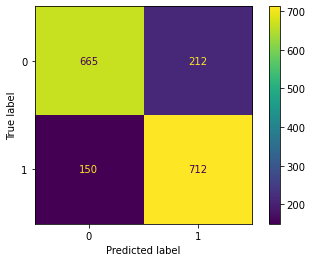

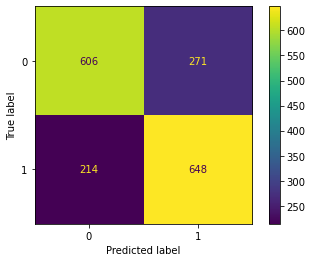

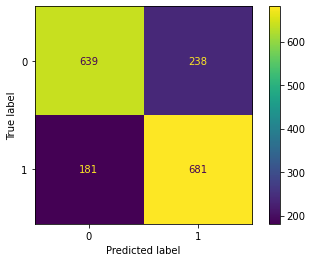

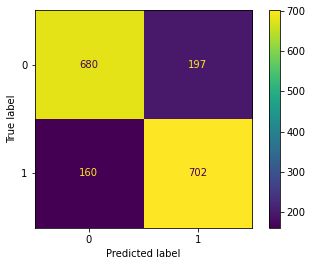

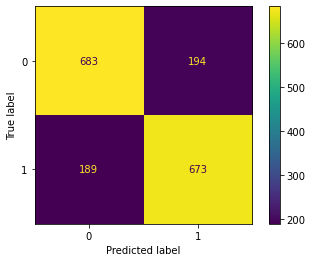

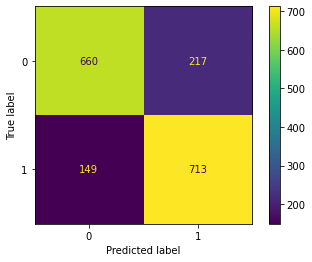

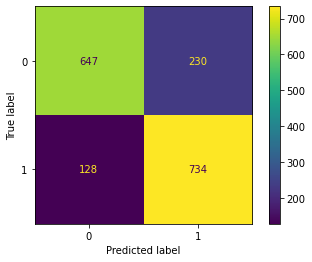

In [22]:
regression_models = [LogisticRegression(), 
                     DecisionTreeClassifier(), 
                     KNeighborsClassifier(), 
                     SVC(), 
                     RandomForestClassifier(), 
                     AdaBoostClassifier(), 
                     GradientBoostingClassifier()]

for model in regression_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f'Model: {str(model)}')
    print(plot_confusion_matrix(model, X_test, y_test))
    print(classification_report(y_test, y_pred))
    print('-'*30, '\n')

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid = {'n_estimators':[10,50,100,500], 
              'max_depth':[3,4,5,6],}

In [25]:
estimator = GradientBoostingClassifier()

In [26]:
grid_model = GridSearchCV(estimator=estimator, param_grid=param_grid)

In [27]:
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [10, 50, 100, 500]})

In [28]:
grid_model.best_params_

{'max_depth': 4, 'n_estimators': 100}

In [34]:
model = GradientBoostingClassifier(max_depth=4, n_estimators=100)

In [39]:
X_final = df_test.drop('Transported_True', axis=1)

In [40]:
model.fit(scaler.fit_transform(X), y)

GradientBoostingClassifier(max_depth=4)

In [42]:
preds = model.predict(scaler.transform(X_final))

In [44]:
sample_submission = pd.read_csv('sample_submission.csv')

In [46]:
sample_submission['preds'] = preds

In [49]:
sample_submission['preds'] = sample_submission['preds'].map({1:True, 0:False})

In [52]:
sample_submission.drop('Transported', axis=1, inplace=True)

In [54]:
sample_submission.columns = ['PassengerId', 'Transported']

In [55]:
sample_submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [56]:
sample_submission.to_csv('sample_submission.csv', index=False)